# Unit 5 - Financial Planning

In [90]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
import pytz

%matplotlib inline

In [61]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [62]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 1.5

In [63]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [64]:
# Fetch current BTC price
btc_price =  requests.get(btc_url).json()
btc_price = btc_price['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
# YOUR CODE HERE!
eth_price =  requests.get(eth_url).json()
eth_price = eth_price['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
#crypto_value = my_btc + my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47708.40
The current value of your 1.5 ETH is $3839.74


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [65]:
# Set current amount of shares
my_agg = 200
my_spy = 50

shares_data = [my_agg, my_spy]

In [66]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [67]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-07-14", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

#Created Dataframe for the collective shares
#df_shares = pd.DataFrame(shares_data, index=tickers)

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-07-14 00:00:00-04:00  115.59  115.76  115.569  115.75  3907266  437.39   

                                                             
                             high     low   close    volume  
time                                                         
2021-07-14 00:00:00-04:00  437.92  434.91  436.22  54445950

In [68]:
#Set start and end date for two year timeframe
start_date = pd.Timestamp("2018-06-16", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-16", tz="America/New_York").isoformat()
#Defined the year portfolio
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

In [69]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

spy_price = float(df_portfolio["SPY"]["close"])
agg_price = float(df_portfolio["AGG"]["close"])
# YOUR CODE HERE!
agg_closing_prices = agg_price
spy_closing_prices = spy_price

#my_spy_value.dropna(inplace=True)
#my_agg_value.dropna(inplace=True)

# Print AGG and SPY close prices
print(f"Current AGG & SPY closing price: ${df_portfolio}")

Current AGG & SPY closing price: $                              AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-07-14 00:00:00-04:00  115.59  115.76  115.569  115.75  3907266  437.39   

                                                             
                             high     low   close    volume  
time                                                         
2021-07-14 00:00:00-04:00  437.92  434.91  436.22  54445950  


In [70]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_price * my_spy
my_agg_value = agg_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
#print(f"SPY value is:${my_spy_value}") 


#print(f"AGG value is:${my_agg_value}")



The current value of your 50 SPY shares is $21811.00
The current value of your 200 AGG shares is $23150.00


### Savings Health Analysis

In [71]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
#financial_assets = pd.concat([my_agg_value, my_btc_value, my_eth_value, my_spy_value], axis="columns", join="inner")
financial_assets = [my_agg_value + my_spy_value, my_btc_value + my_eth_value]
# Create savings DataFrame
# YOUR CODE HERE!
financial_assets = pd.DataFrame(financial_assets, columns=['Amount'],index=['Crypto','Shares'])


# Display savings DataFrame
display(financial_assets)


,Amount
Crypto,44961.000
Shares,51548.145


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='Amount'>

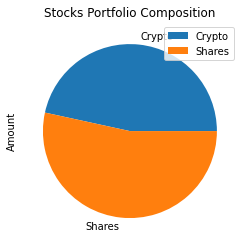

In [72]:
# Plot savings pie chart
# YOUR CODE HERE!
financial_assets.plot.pie(y="Amount", title="Stocks Portfolio Composition")

In [73]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = monthly_income + financial_assets
# Validate saving health
# YOUR CODE HERE!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [74]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [75]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

NameError: name 'df_stock_data' is not defined

In [88]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_fiveyear = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [89]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_fiveyear.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
time                                                                  
2021-07-14 00:00:00-04:00  115.59  115.76  115.569  115.75  3907266   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2021-07-14 00:00:00-04:00          NaN  437.39  437.92  434.91  436.22   

                                                  
                             volume daily_return  
time                                              
2021-07-14 00:00:00-04:00  54445950          NaN

In [94]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirty_year = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

MC_data = MC_thirty_year.calc_cumulative_return()
MC_data()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

TypeError: 'DataFrame' object is not callable

In [92]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_data.plt.plot(MC_thirty_year)

AttributeError: 'MCSimulation' object has no attribute 'plt'

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")